# Convergence testing the 2nd-order acoustic example

In this notebook, we will convergence test Schism's immersed boundary implementation against the previously presented exact solution.

Operator `normals` ran in 0.01 s
/home/ed/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ed/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
Operator `Kernel` ran in 0.41 s


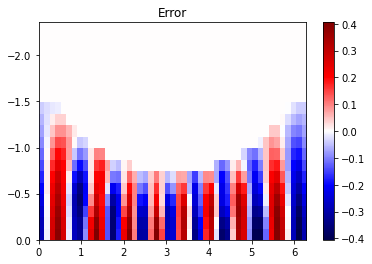

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 0.48 s


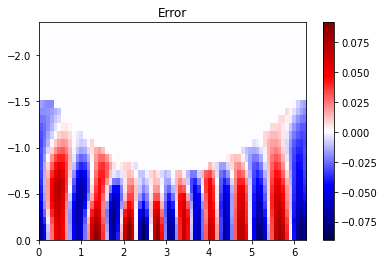

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 0.89 s


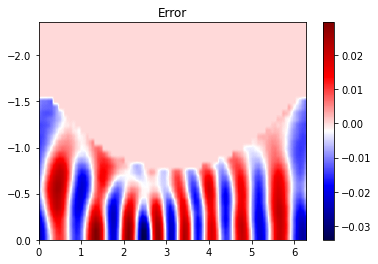

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 1.27 s


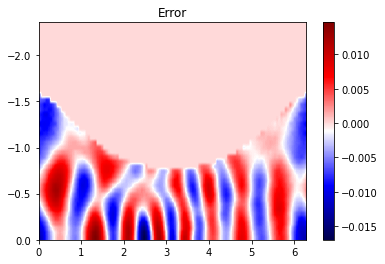

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 1.91 s


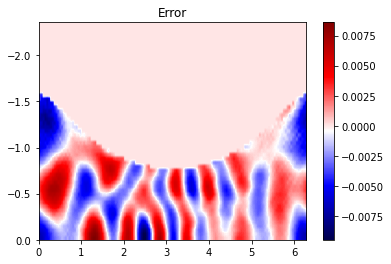

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 2.86 s


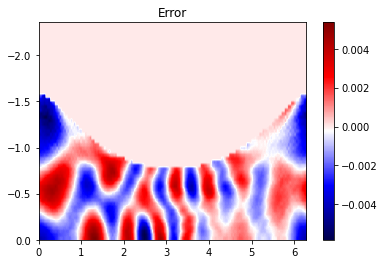

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 5.69 s


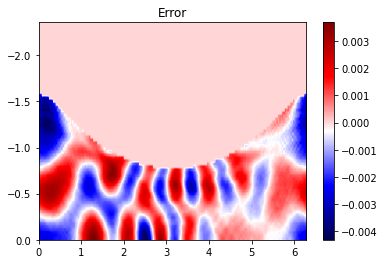

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 5.45 s


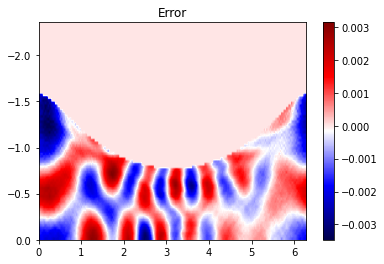

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 9.91 s


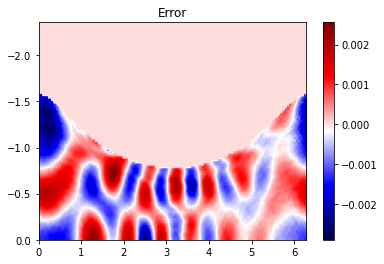

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 14.17 s


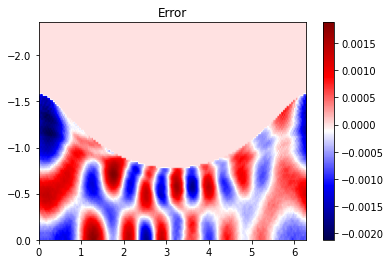

Operator `normals` ran in 0.01 s
Operator `Kernel` ran in 22.91 s


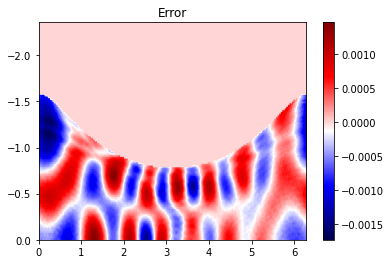

In [1]:
from convergence import calculate_error

refinements = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4]
errs_max = []

for refinement in refinements:
    max_err = calculate_error(refinement)
    errs_max.append(max_err)

Plotting the convergence, we can see we have a similar trend to that reported for Mulder's scheme, with an approximately fourth-order trend, and a knee at a grid increment of around $\Delta x = 0.02$, after which the order of convergence drops off somewhat.

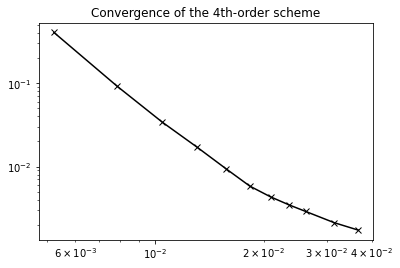

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.loglog(np.array(refinements)*2*np.pi/240, errs_max, 'kx')
plt.loglog(np.array(refinements)*2*np.pi/240, errs_max, 'k')
plt.title("Convergence of the 4th-order scheme")
plt.show()

Finding the convergence gradient before the knee, we see that the scheme attains just short of 4th-order.

In [5]:
grad = -np.polyfit(np.log10(np.array(refinements[:5])*2*np.pi/240), np.log10(errs_max[:5]), 1)[0]
grad

3.415075780436305

In [6]:
grad_knee = -np.polyfit(np.log10(np.array(refinements[5:])*2*np.pi/240), np.log10(errs_max[5:]), 1)[0]
grad_knee

1.742123201794613